<a href="https://colab.research.google.com/github/SamanthaArzate/Proyecto_1_IDO/blob/master/1_clase_text_analytics_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Un Panorama Básico del Procesamiento y Análisis de Texto

# Avances

* https://platform.openai.com/docs/overview


# Vínculos a librerías de interés

* https://www.nltk.org
* https://www.nltk.org/nltk_data/
* https://stanfordnlp.github.io/stanza/
* https://spacy.io/



#Funciones básicas de procesamiento de texto

In [ ]:
texto = "   funciones BáSicas de proCesamIento de texto%   "
texto.rstrip()
texto.lstrip()
texto.strip("%")
texto = texto.replace("á", "a").strip()
texto.capitalize()
texto.upper()
lista = ["Funciones", "BáSicas", "de", "proCesamIento", "de", "texto"]
frase = " ".join(lista)
frase.split()

['Funciones', 'BáSicas', 'de', 'proCesamIento', 'de', 'texto']



#Librerías, modelos y lenguajes



In [ ]:
import nltk
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#!python -m spacy download en_core_web_sm
!python -m spacy download es_core_news_sm
#https://spacy.io/usage/models
#nlp = spacy.load("en_core_web_sm")
nlp = spacy.load("es_core_news_sm")

2024-02-01 02:09:04.232488: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-01 02:09:04.232561: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-01 02:09:04.234797: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-01 02:09:05.503005: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 27.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


# Raíz (Stem):
Basado en reglas simples. Es rápido, pero inexacto

In [ ]:
from nltk.stem import SnowballStemmer, PorterStemmer

texto_ing = "My account keeps getting locked, their accounts got locked yesterday, so everyone's access was denied. I am having a terrible day, I'm better off sleeping."
texto_esp = "Mi cuenta se sigue bloqueando, sus cuentas se bloquearon ayer, entonces se le nego el acceso a todos. Estoy teniendo un día terrible, estaría mejor durmiendo"

def text_stemmer(texto, tipo, lenguaje):
  if tipo == "snowball":
    stemmer = SnowballStemmer(lenguaje)
  else:
    stemmer = PorterStemmer()
  texto = " ".join([stemmer.stem(palabra) for palabra in texto.split()])
  return texto

print(text_stemmer(texto_ing, "snowball", "english"))
print(text_stemmer(texto_ing, "porter", "english"))
print(text_stemmer(texto_esp, "snowball", "spanish"))
print(text_stemmer(texto_esp, "porter", "spanish"))


my account keep get locked, their account got lock yesterday, so everyon access was denied. i am have a terribl day, i'm better off sleeping.
my account keep get locked, their account got lock yesterday, so everyone' access wa denied. i am have a terribl day, i'm better off sleeping.
mi cuent se sig bloqueando, sus cuent se bloqu ayer, entonc se le neg el acces a todos. estoy ten un dia terrible, estar mejor durm
mi cuenta se sigu bloqueando, su cuenta se bloquearon ayer, entonc se le nego el acceso a todos. estoy teniendo un día terrible, estaría mejor durmiendo


#Lemas
Basado en dicionarios y/o análisis morfológico. Es lento, pero exacto

In [ ]:
texto_ing = "My account keeps getting locked, their accounts got locked yesterday, so everyone's access was denied. I am having a terrible day, I'm better off sleeping."
texto_esp = "Mi cuenta se sigue bloqueando, sus cuentas se bloquearon ayer, entonces se le nego el acceso a todos. Estoy teniendo un día terrible, estaría mejor durmiendo"

def text_lemmatizer(texto):
  texto = nlp(texto)
  texto =  " ".join([palabra.lemma_ for palabra in texto])
  return texto

print(texto_esp)
#print(text_stemmer(texto_ing, "snowball", "english"))
#print(text_stemmer(texto_ing, "porter", "english"))
print(text_lemmatizer(texto_esp))

Mi cuenta se sigue bloqueando, sus cuentas se bloquearon ayer, entonces se le nego el acceso a todos. Estoy teniendo un día terrible, estaría mejor durmiendo
mi cuenta él seguir bloquear , su cuenta él bloquear ayer , entonces él él negar el acceso a todo . estar tener uno día terrible , estar mejor dormir


#Sintáxis y Estructura

In [ ]:
sentencia = "The black cat is quick and it is jumping over the friendly dog"

# Palabras anotadas "Parts of Speech" con nltk

In [ ]:
nltk.download("averaged_perceptron_tagger")
etiquetas_pos = nltk.pos_tag(sentencia.split())
etiquetas_pos

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('The', 'DT'),
 ('black', 'JJ'),
 ('cat', 'NN'),
 ('is', 'VBZ'),
 ('quick', 'JJ'),
 ('and', 'CC'),
 ('it', 'PRP'),
 ('is', 'VBZ'),
 ('jumping', 'VBG'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('friendly', 'JJ'),
 ('dog', 'NN')]

# Palabras anotadas "Parts of Speech" con spacy

In [ ]:
spacy_etiquetas_pos = [(palabra, palabra.pos_) for palabra in nlp(sentencia)]
spacy_etiquetas_pos

[(The, 'PROPN'),
 (black, 'PROPN'),
 (cat, 'PROPN'),
 (is, 'PROPN'),
 (quick, 'PROPN'),
 (and, 'PROPN'),
 (it, 'PROPN'),
 (is, 'PROPN'),
 (jumping, 'PROPN'),
 (over, 'VERB'),
 (the, 'PROPN'),
 (friendly, 'PROPN'),
 (dog, 'PROPN')]

In [ ]:
spacy.explain("ADJ")

'adjective'

#Shallow parsing: palabras ⟵ frases ⟵ cláusulas ⟵ sentencias






In [ ]:
gramatica = """ NP: {<DT>?<JJ>?<NN.*>}
                ADJP: {<JJ>}
                ADVP: {<RB.*>}
                PP: {<IN>}
                VP: {<MD>?<VB.*>+}"""

sentencia_etiquetada = nltk.pos_tag(sentencia.split())
rp = nltk.RegexpParser(gramatica)
sentencia_parseada = rp.parse(sentencia_etiquetada)
print(sentencia_parseada)

(S
  (NP The/DT black/JJ cat/NN)
  (VP is/VBZ)
  (ADJP quick/JJ)
  and/CC
  it/PRP
  (VP is/VBZ jumping/VBG)
  (PP over/IN)
  (NP the/DT friendly/JJ dog/NN))


In [ ]:
!pip install svgling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 1.7 MB/s eta 0:00:00


In [ ]:
from spacy import displacy

displacy.render(nlp(sentencia), jupyter=True,
                options={"distance": 100,
                         "arrow_stroke": 1.5,
                         "arrow_width": 8})

#Corpus Brown

In [ ]:
from nltk.corpus import brown

nltk.download("brown")
print(brown.readme())
brown.categories()

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


BROWN CORPUS

A Standard Corpus of Present-Day Edited American
English, for use with Digital Computers.

by W. N. Francis and H. Kucera (1964)
Department of Linguistics, Brown University
Providence, Rhode Island, USA

Revised 1971, Revised and Amplified 1979

http://www.hit.uib.no/icame/brown/bcm.html

Distributed with the permission of the copyright holder,
redistribution permitted.



['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

# Acceso a sentencias

In [ ]:
sentencias = brown.sents(categories="mystery")
sentencias

[['There', 'were', 'thirty-eight', 'patients', 'on', 'the', 'bus', 'the', 'morning', 'I', 'left', 'for', 'Hanover', ',', 'most', 'of', 'them', 'disturbed', 'and', 'hallucinating', '.'], ['An', 'interne', ',', 'a', 'nurse', 'and', 'two', 'attendants', 'were', 'in', 'charge', 'of', 'us', '.'], ...]

#Tokenización de palabras

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize, wordpunct_tokenize
nltk.download("punkt")
texto = "This is, a; sentence. \n This ... is another sentence."
print(word_tokenize(texto))
print(sent_tokenize(texto))
print(wordpunct_tokenize(texto))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['This', 'is', ',', 'a', ';', 'sentence', '.', 'This', '...', 'is', 'another', 'sentence', '.']
['This is, a; sentence.', 'This ... is another sentence.']
['This', 'is', ',', 'a', ';', 'sentence', '.', 'This', '...', 'is', 'another', 'sentence', '.']


# Palabras anotadas "Parts of Speech"

In [ ]:
palabras_etiquetadas = brown.tagged_sents(categories="mystery")
palabras_etiquetadas

[[('There', 'EX'), ('were', 'BED'), ('thirty-eight', 'CD'), ('patients', 'NNS'), ('on', 'IN'), ('the', 'AT'), ('bus', 'NN'), ('the', 'AT'), ('morning', 'NN'), ('I', 'PPSS'), ('left', 'VBD'), ('for', 'IN'), ('Hanover', 'NP'), (',', ','), ('most', 'AP'), ('of', 'IN'), ('them', 'PPO'), ('disturbed', 'VBN'), ('and', 'CC'), ('hallucinating', 'VBG'), ('.', '.')], [('An', 'AT'), ('interne', 'NN'), (',', ','), ('a', 'AT'), ('nurse', 'NN'), ('and', 'CC'), ('two', 'CD'), ('attendants', 'NNS'), ('were', 'BED'), ('in', 'IN'), ('charge', 'NN'), ('of', 'IN'), ('us', 'PPO'), ('.', '.')], ...]

# Extracción de sustantivos

In [ ]:
#spacy.explain("NN")
#spacy.explain("NNS")
#spacy.explain("NP")
sustantivos = []
for frase in palabras_etiquetadas:
  for token in frase:
    if token[1] in ["NN", "NNS", "NP"]:
      sustantivos.append(token[0])
print(sustantivos)

['patients', 'bus', 'morning', 'Hanover', 'interne', 'nurse', 'attendants', 'charge', 'bus', 'window', 'drone', 'voices', 'odors', 'patients', 'ward', 'state', 'Illinois', 'hospital', 'Mary', 'Jane', 'Brennan', 'way', 'eyes', 'anger', 'competence', 'gentleness', 'sweetness', 'surface', 'defenses', 'friends', 'stay', 'stories', 'newspapers', 'adventure', 'address', 'student', 'university', 'studies', 'relative', 'remorse', 'newspaper', 'stories', 'girl', 'booze', 'drunk', 'Nonsense', 'neighborhood', 'drunks', 'kind', 'love', 'girl', 'difference', 'Mary', 'Jane', 'eyes', 'people', 'patient', 'care', 'people', 'Mary', 'Jane', 'lifetime', 'while', 'whiskey', 'indifference', 'attitudes', 'girl', 'engagement', 'school', 'ward', 'months', 'ones', 'promises', 'sickness', 'stay', 'joke', 'joke', 'place', 'Hanover', 'college', 'Chicago', 'eyes', 'Anderson', 'reality', 'college', 'children', 'policeman', 'dollars', 'year', 'money', 'tuition', 'clothes', 'things', 'dollars', 'month', 'deal', 'nurs


# Distribución de Frecuencias: Los sustantivos más utilizados

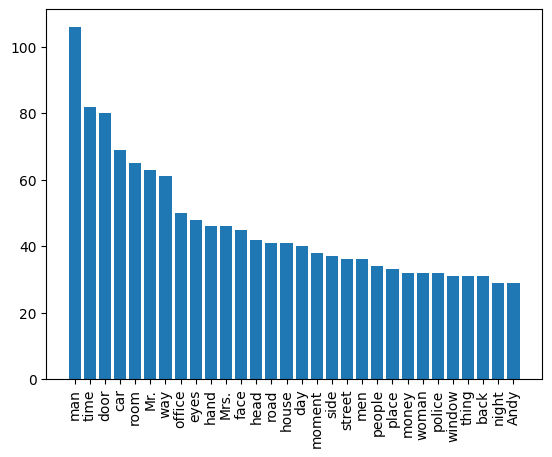

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
frecuencia_sustantivos = nltk.FreqDist(sustantivos)
palabras = pd.DataFrame(frecuencia_sustantivos.most_common(30))
palabras.columns = ["sustantivo", "frecuencia"]
plt.bar(x=palabras["sustantivo"], height=palabras["frecuencia"])
plt.xticks(rotation=90)
plt.show()

# Corpus Reuters

In [ ]:
from nltk.corpus import reuters
nltk.download("reuters")
print("Total de categorías", len(reuters.categories()))
reuters.readme()

[nltk_data] Downloading package reuters to /root/nltk_data...


Total de categorías 90


'\n      The Reuters-21578 benchmark corpus, ApteMod version\n\nThis is a publically available version of the well-known Reuters-21578\n"ApteMod" corpus for text categorization.  It has been used in\npublications like these:\n\n * Yiming Yang and X. Liu. "A re-examination of text categorization\n   methods".  1999.  Proceedings of 22nd Annual International SIGIR.\n   http://citeseer.nj.nec.com/yang99reexamination.html\n\n * Thorsten Joachims. "Text categorization with support vector\n   machines: learning with many relevant features".  1998. Proceedings\n   of ECML-98, 10th European Conference on Machine Learning.\n   http://citeseer.nj.nec.com/joachims98text.html\n\nApteMod is a collection of 10,788 documents from the Reuters financial\nnewswire service, partitioned into a training set with 7769 documents\nand a test set with 3019 documents.  The total size of the corpus is\nabout 43 MB.  It is also available for download from\nhttp://kdd.ics.uci.edu/databases/reuters21578/reuters2157

# Reuters - Entrenamiento y Prueba

In [ ]:
print(reuters.categories())

['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee', 'copper', 'copra-cake', 'corn', 'cotton', 'cotton-oil', 'cpi', 'cpu', 'crude', 'dfl', 'dlr', 'dmk', 'earn', 'fuel', 'gas', 'gnp', 'gold', 'grain', 'groundnut', 'groundnut-oil', 'heat', 'hog', 'housing', 'income', 'instal-debt', 'interest', 'ipi', 'iron-steel', 'jet', 'jobs', 'l-cattle', 'lead', 'lei', 'lin-oil', 'livestock', 'lumber', 'meal-feed', 'money-fx', 'money-supply', 'naphtha', 'nat-gas', 'nickel', 'nkr', 'nzdlr', 'oat', 'oilseed', 'orange', 'palladium', 'palm-oil', 'palmkernel', 'pet-chem', 'platinum', 'potato', 'propane', 'rand', 'rape-oil', 'rapeseed', 'reserves', 'retail', 'rice', 'rubber', 'rye', 'ship', 'silver', 'sorghum', 'soy-meal', 'soy-oil', 'soybean', 'strategic-metal', 'sugar', 'sun-meal', 'sun-oil', 'sunseed', 'tea', 'tin', 'trade', 'veg-oil', 'wheat', 'wpi', 'yen', 'zinc']


#Tokenización de Sentencias

In [ ]:
nltk.download("punkt")
sentencias = reuters.sents(categories=["housing", "income"])
sentencias = [" ".join(sentencia) for sentencia in sentencias]
sentencias[0:5]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


["YUGOSLAV ECONOMY WORSENED IN 1986 , BANK DATA SHOWS National Bank economic data for 1986 shows that Yugoslavia ' s trade deficit grew , the inflation rate rose , wages were sharply higher , the money supply expanded and the value of the dinar fell .",
 'The trade deficit for 1986 was 2 . 012 billion dlrs , 25 . 7 pct higher than in 1985 .',
 'The trend continued in the first three months of this year as exports dropped by 17 . 8 pct , in hard currency terms , to 2 . 124 billion dlrs .',
 'Yugoslavia this year started quoting trade figures in dinars based on current exchange rates , instead of dollars based on a fixed exchange rate of 264 . 53 dinars per dollar .',
 "Yugoslavia ' s balance of payments surplus with the convertible currency area fell to 245 mln dlrs in 1986 from 344 mln in 1985 ."]

# Acceso a identificadores de archivos

In [ ]:
print(reuters.fileids(categories=["housing", "income"]))

['test/16118', 'test/18534', 'test/18540', 'test/18664', 'test/18665', 'test/18672', 'test/18911', 'test/19875', 'test/20106', 'test/20116', 'training/1035', 'training/1036', 'training/10602', 'training/10604', 'training/11170', 'training/11665', 'training/2618', 'training/29', 'training/3105', 'training/3708', 'training/3720', 'training/3723', 'training/3898', 'training/5883', 'training/5886', 'training/6000', 'training/6067', 'training/6197', 'training/7005', 'training/7006', 'training/7015', 'training/7036', 'training/7098', 'training/7099', 'training/9615']


In [ ]:
print(reuters.sents(fileids=["test/16118", "test/18534"]))

[['YUGOSLAV', 'ECONOMY', 'WORSENED', 'IN', '1986', ',', 'BANK', 'DATA', 'SHOWS', 'National', 'Bank', 'economic', 'data', 'for', '1986', 'shows', 'that', 'Yugoslavia', "'", 's', 'trade', 'deficit', 'grew', ',', 'the', 'inflation', 'rate', 'rose', ',', 'wages', 'were', 'sharply', 'higher', ',', 'the', 'money', 'supply', 'expanded', 'and', 'the', 'value', 'of', 'the', 'dinar', 'fell', '.'], ['The', 'trade', 'deficit', 'for', '1986', 'was', '2', '.', '012', 'billion', 'dlrs', ',', '25', '.', '7', 'pct', 'higher', 'than', 'in', '1985', '.'], ...]


# Semántica: sinónimos con WordNet

In [ ]:
from nltk.corpus import wordnet as wn
nltk.download("wordnet")
nltk.download("omw-1.4")
palabra = "cobrar"
sinonimos = wn.synsets(palabra, lang="spa")
for sinonimo in sinonimos:
  print(sinonimo, "\n", sinonimo.name(), sinonimo.definition(), sinonimo.examples(), "\n", sinonimo.pos(), "\n", sinonimo.lemmas(lang="eng"), "\n",)

Synset('get.v.25') 
 get.v.25 receive as a retribution or punishment ['He got 5 years in prison'] 
 v 
 [Lemma('get.v.25.get'), Lemma('get.v.25.receive')] 

Synset('cash.v.01') 
 cash.v.01 exchange for cash ['I cashed the check as soon as it arrived in the mail'] 
 v 
 [Lemma('cash.v.01.cash'), Lemma('cash.v.01.cash_in')] 

Synset('take_home.v.01') 
 take_home.v.01 earn as a salary or wage ['How much does your wife take home after taxes and other deductions?'] 
 v 
 [Lemma('take_home.v.01.take_home'), Lemma('take_home.v.01.bring_home')] 

Synset('charge.v.03') 
 charge.v.03 demand payment ['Will I get charged for this service?', 'We were billed for 4 nights in the hotel, although we stayed only 3 nights'] 
 v 
 [Lemma('charge.v.03.charge'), Lemma('charge.v.03.bill')] 

Synset('check_out.v.05') 
 check_out.v.05 record, add up, and receive payment for items purchased ['She was checking out the apples that the customer had put on the conveyer belt'] 
 v 
 [Lemma('check_out.v.05.check_out'

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Detalles Semánticos